# Sales Analysis

In [4]:
import pandas as pd
import os

#### Merging 12 months data into a single file

In [5]:
df = pd.read_csv('C:\RAKSHA\Python\Projects\Sales_Analysis\SalesAnalysis\Sales_Data/Sales_May_2019.csv')

files = [file for file in os.listdir('C:\RAKSHA\Python\Projects\Sales_Analysis\SalesAnalysis\Sales_Data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [9]:
all_data = pd.DataFrame()

for file in files:
    abc = pd.read_csv('C:/RAKSHA/Python/Projects/Sales_Analysis/SalesAnalysis/Sales_Data/'+file)
    all_data = pd.concat([all_data,abc])
    
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
all_data.shape

(186850, 6)

In [11]:
all_data.to_csv('all_data.csv', index=False)

In [ ]:
all_data = pd.read_csv('C:\RAKSHA\Python\Projects\Sales_Analysis\SalesAnalysis/all_data.csv')

In [31]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [32]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",09


### Droping Nan rows

In [33]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [34]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.shape

(545, 7)

In [35]:
all_data.dropna(how='any', inplace=True)

In [36]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

#### The month column that was created is in str dtype....make it to int dtype

In [37]:
all_data = all_data[all_data['Month'] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [39]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9


In [40]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # converting to int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # converting to float

#### Adding a sales column

In [41]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Finding out the best month for sales and the amount earned in that month

In [49]:
results = all_data.groupby('Month').sum()

#### December was the month with highest sales

In [43]:
import matplotlib.pyplot as plt

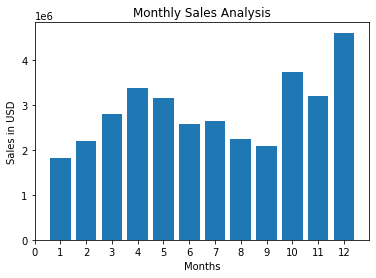

In [54]:
plt.bar(x = range(1,13) ,height=results['Sales'])
plt.xticks(range(0,13))
plt.ylabel("Sales in USD")
plt.xlabel('Months')
plt.title('Monthly Sales Analysis')
plt.show()

#### Adding a city column to analyse the sales w.t.r cities

In [83]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1] + ")")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [84]:
all_data.City.value_counts()

 San Francisco (CA)    44732
 Los Angeles (CA)      29605
 New York City (NY)    24876
 Boston (MA)           19934
 Atlanta (GA)          14881
 Dallas (TX)           14820
 Seattle (WA)          14732
 Portland (OR)         10010
 Austin (TX)            9905
 Portland (ME)          2455
Name: City, dtype: int64

In [85]:
all_data.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


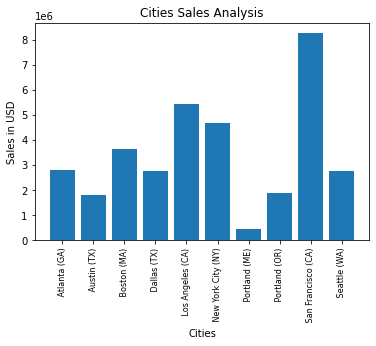

In [94]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, all_data.groupby('City').sum()['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel("Sales in USD")
plt.xlabel('Cities')
plt.title('Cities Sales Analysis')
plt.show()

#### From the above data, San Francisco has made the highest sales

### What time should we display advertisements to maximise sales

In [96]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [99]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [103]:
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [104]:
all_data.groupby('Hour').sum()

,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


<function matplotlib.pyplot.show(close=None, block=None)>

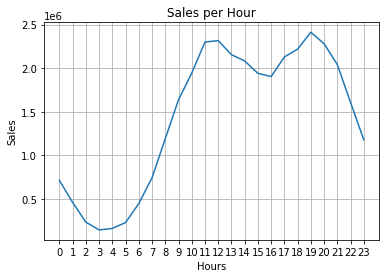

In [106]:
hour = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hour, all_data.groupby('Hour').sum()['Sales'])
plt.xticks(hour)
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.title('Sales per Hour')
plt.grid()
plt.show

#### Highest sales/orders happen at 11 a.m and 7 p.m and hence the best time to advertise would be from 1 hour before these hours as that would further increase sales

### What products are most often sold together

In [107]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [110]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df.head()

<ipython-input-110-9298bc7a423d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [111]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [112]:
df.shape

(7136, 2)

In [114]:
from itertools import combinations
from collections import Counter

count = Counter()
for each in df['Grouped']:
    sub_list = each.split(',')
    count.update(Counter(combinations(sub_list, 2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [115]:
for key,value in count.most_common(10):
    print(value, key)

1005 ('iPhone', 'Lightning Charging Cable')
987 ('Google Phone', 'USB-C Charging Cable')
447 ('iPhone', 'Wired Headphones')
414 ('Google Phone', 'Wired Headphones')
361 ('Vareebadd Phone', 'USB-C Charging Cable')
360 ('iPhone', 'Apple Airpods Headphones')
220 ('Google Phone', 'Bose SoundSport Headphones')
160 ('USB-C Charging Cable', 'Wired Headphones')
143 ('Vareebadd Phone', 'Wired Headphones')
92 ('Lightning Charging Cable', 'Wired Headphones')


### What product sold the most

In [118]:
all_data.groupby('Product').sum()['Quantity Ordered']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [120]:
products = [pro for pro, df in all_data.groupby('Product')]

<function matplotlib.pyplot.show(close=None, block=None)>

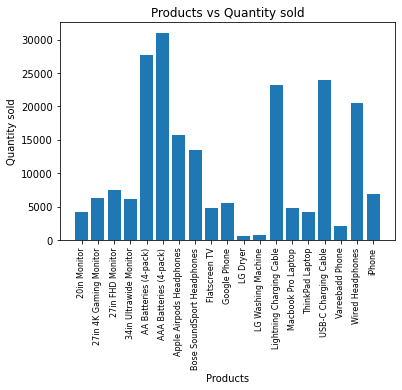

In [123]:
plt.bar(products, all_data.groupby('Product').sum()['Quantity Ordered'])
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity sold')
plt.title('Products vs Quantity sold')
plt.show

#### AAA Batteries are the most sold products

In [124]:
# comparing the price of the products

In [125]:
prices = all_data.groupby('Product').mean()['Price Each']

In [126]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-129-1e8b28fd2e37>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
<ipython-input-129-1e8b28fd2e37>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


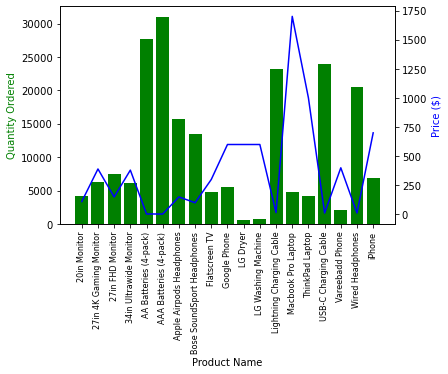

In [129]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, all_data.groupby('Product').sum()['Quantity Ordered'], color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

#### The above graph compares the product ordered and the product price it is seen from the graph that they are inversely related i.e more the price less is the product ordered